## MP3 Report Plots

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

pd.set_option('display.float_format', lambda x: '%e' % x)

In [2]:
unity_gain = pd.read_csv('unitygain_func.csv')
unity_gain['Phase (deg)'] = np.unwrap(unity_gain['Phase (deg)'], period=360)
unity_gain['Magnitude (dB)'] = unity_gain['Magnitude (dB)']
fig, ax = plt.subplots()
ax.set_xscale('log')

unity_gain.plot(x='Frequency (Hz)', y='Magnitude (dB)', ax = ax)
plt.axhline(y = -3, color = 'lightblue', linestyle = '--') # <== tune to find Gain margin
plt.axvline(x = 10**6, color = 'lightblue', linestyle = '--') 
plt.ylabel('Magnitude (dB)')

unity_gain.plot(x='Frequency (Hz)', y='Phase (deg)', ax = ax, secondary_y = True, title = 'Unity Gain Bode Plot')
plt.ylabel('Phase (deg)')

FileNotFoundError: [Errno 2] No such file or directory: 'unity_gain_func.csv'

Text(0, 0.5, 'Phase (deg)')

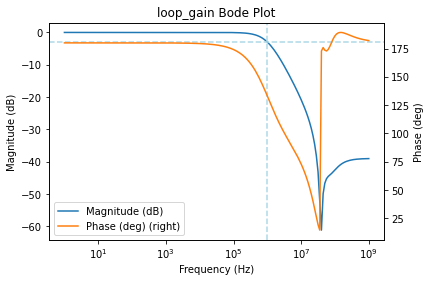

In [4]:
loop_gain = pd.read_csv('loopgain_func.csv')
loop_gain['Phase (deg)'] = np.unwrap(loop_gain['Phase (deg)'], period=360)
loop_gain['Magnitude (dB)'] = loop_gain['Magnitude (dB)']
fig, ax = plt.subplots()
ax.set_xscale('log')

loop_gain.plot(x='Frequency (Hz)', y='Magnitude (dB)', ax = ax)
plt.axhline(y = -3, color = 'lightblue', linestyle = '--') # <== tune to find Gain margin
plt.axvline(x = 10**6, color = 'lightblue', linestyle = '--') 
plt.ylabel('Magnitude (dB)')

loop_gain.plot(x='Frequency (Hz)', y='Phase (deg)', ax = ax, secondary_y = True, title = 'Loopgain Bode Plot')
plt.ylabel('Phase (deg)')